<a href="https://colab.research.google.com/github/Krieg2065/Python/blob/main/esJoinSpaziali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

si vogliono estrarre alcune informazioni dei dataset riguradanti la regione lombardia,
in particolare si vogliono avere informazioni:
1. l'elenco dei comunicon i fiumi che li attraversano (nome comune e nome fiume)

2. contare per ogni comune il numero di fiumi che li attraversano.
Se un comune non è attraversato da un fiume indicare 0.

3. Elenco le province con le autostrade che le attraversano.
Visualizzare anche le province che non sono attraversate da autostrade.

4. Visualizzare su una mappa i risultati del esercizio 3 facendo in modo che le province che non sono attraversate da autostrade siano contornate di nero mentre le altre province devono essere colorate a seconda del numero di autostrade che le attraversano.

5. Visualizzare su una mappa i quartieri di Milano colorati a seconda del numero di fontanelle presenti.

6. Visualizzare l'elenco dei quartieri di Milano che confino con comuni fuori milano.
Indicare il nome del quartiere e il nome del comune con cui confina

In [ ]:
autoStrade = geopandas.read_file("/content/drive/MyDrive/geopandas/data/Autostrade_10000_CT10_line.zip") 
fiumi = geopandas.read_file("/content/drive/MyDrive/geopandas/data2/Corsi_acqua_Piano_di_Gestione.zip")
fontanelle = geopandas.read_file("/content/drive/MyDrive/geopandas/data2/Fontanelle.zip")
comuni = geopandas.read_file("/content/drive/MyDrive/geopandas/data2/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
province = geopandas.read_file("/content/drive/MyDrive/geopandas/data2/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
quartieri = geopandas.read_file("/content/drive/MyDrive/geopandas/italy/ds964_nil_wm.zip")
regioni = geopandas.read_file("/content/drive/MyDrive/geopandas/data2/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")

In [ ]:
geomlomb

In [ ]:
# import modulo os e installazione di rtree e altro per far funzionare l'sjoin
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas
import contextily

In [ ]:
lombardia = regioni[regioni["DEN_REG"] == "Lombardia"]
geomlomb = lombardia.geometry.squeeze()

In [ ]:
fiumiComuni = geopandas.sjoin(fiumi,comuni,op = "intersects",how = "right").reset_index()
fiumiComuni[fiumiComuni.intersects(geomlomb)][["COMUNE", "NOME"]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,COMUNE,NOME
327,Caresana,NaN
355,Motta de' Conti,NaN
360,Pezzana,NaN
364,Prarolo,NaN
388,Vercelli,NaN
...,...,...
7852,Busnago,NaN
7853,Caponago,La Molgora (Torrente)
7854,Cornate d'Adda,NaN
7855,Lentate sul Seveso,NaN


In [ ]:
fiumiComuni[fiumiComuni.intersects(geomlomb)][["COMUNE", "NOME"]].groupby("COMUNE").count().reset_index()

,COMUNE,NOME
0,Abbadia Cerreto,0
1,Abbadia Lariana,0
2,Abbiategrasso,3
3,Acquafredda,0
4,Acquanegra Cremonese,0
...,...,...
1619,Ziano Piacentino,0
1620,Zibido San Giacomo,1
1621,Zinasco,0
1622,Zogno,0


Elenco le province con le autostrade che le attraversano. Visualizzare anche le province che non sono attraversate da autostrade.

In [ ]:
stradeProvince = geopandas.sjoin(autoStrade,province,op = "intersects",how = "right").reset_index()
stradeProvince[stradeProvince.intersects(geomlomb)][["DEN_UTS", "PERCORSO"]]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DEN_UTS,PERCORSO
1,Vercelli,NaN
2,Novara,NaN
5,Alessandria,AUTOSTRADA TORINO- PIACENZA- BRESCIA
6,Alessandria,AUTOSTRADA TORINO- PIACENZA- BRESCIA
7,Alessandria,AUTOSTRADA GENOVA - MILANO
...,...,...
151,Monza e della Brianza,TANGENZIALE EST DI MILANO
152,Monza e della Brianza,AUTOSTRADA TORINO-TRIESTE
153,Monza e della Brianza,AUTOSTRADA TORINO-TRIESTE
154,Monza e della Brianza,TANGENZIALE NORD DI MILANO


Visualizzare su una mappa i risultati del esercizio 3 facendo in modo che le province che non sono attraversate da autostrade siano contornate di nero mentre le altre province devono essere colorate a seconda del numero di autostrade che le attraversano.

In [ ]:
import pandas as pd

In [ ]:
countStrade = stradeProvince[stradeProvince.within(geomlomb)][["DEN_UTS", "PERCORSO"]].groupby("DEN_UTS").count().reset_index()
countStradegeom = pd.merge(province,countStrade,on = "DEN_UTS",how = "inner")[["DEN_UTS", "PERCORSO","geometry"]]
noAutostrade = countStradegeom[countStrade['PERCORSO'] == 0]

In [ ]:
type(noAutostrade)

geopandas.geodataframe.GeoDataFrame

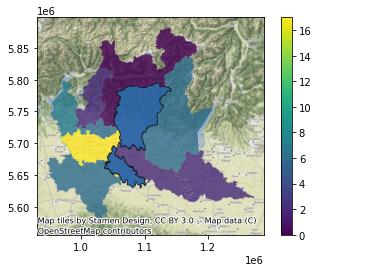

In [ ]:
ax = countStradegeom.to_crs(epsg = 3857).plot(column = "PERCORSO",legend = True,alpha = 0.8)
noAutostrade.to_crs(epsg = 3857).plot(ax=ax , edgecolor = "k",alpha = 0.7)
contextily.add_basemap(ax)

pandas.core.frame.DataFrame